<a href="https://colab.research.google.com/github/chaewoncutie/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In [112]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd

housing = fetch_california_housing(as_frame=True)

In [113]:
target = housing.target

In [114]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [115]:
features = housing.data[["Longitude", "Latitude"]]

In [116]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

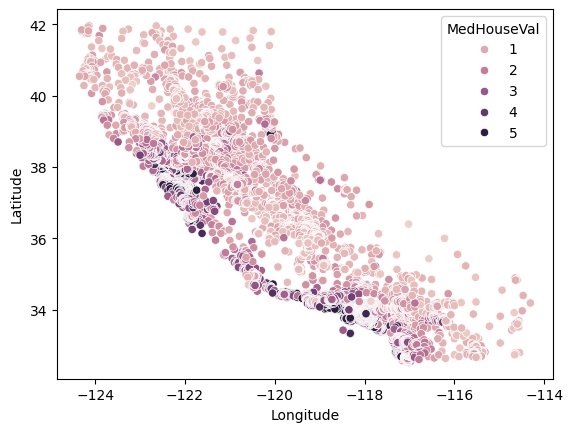

In [117]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [118]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-118-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-118-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [120]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [121]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

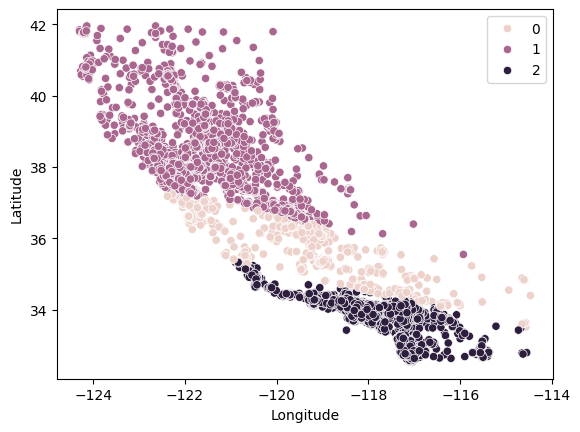

In [122]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

For cluster = 1, SSE/WCSS is 2.0690172605159725
For cluster = 2, SSE/WCSS is 0.8284273171163479
For cluster = 3, SSE/WCSS is 0.2896383867598299
For cluster = 4, SSE/WCSS is 0.132747199063285
For cluster = 5, SSE/WCSS is 0.08993069099852923
For cluster = 6, SSE/WCSS is 0.0546819256900248
For cluster = 7, SSE/WCSS is 0.04024303237480054
For cluster = 8, SSE/WCSS is 0.031246461538058726
For cluster = 9, SSE/WCSS is 0.025368883173397708
For cluster = 10, SSE/WCSS is 0.02021788410079479


Text(0, 0.5, 'WCSS')

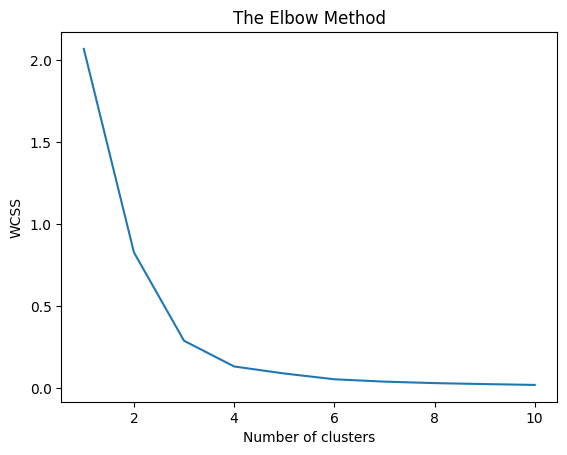

In [123]:
#put your answer here
wcss = []
sse = {}

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print(f"For cluster = {i}, SSE/WCSS is {sse[i]}")


plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

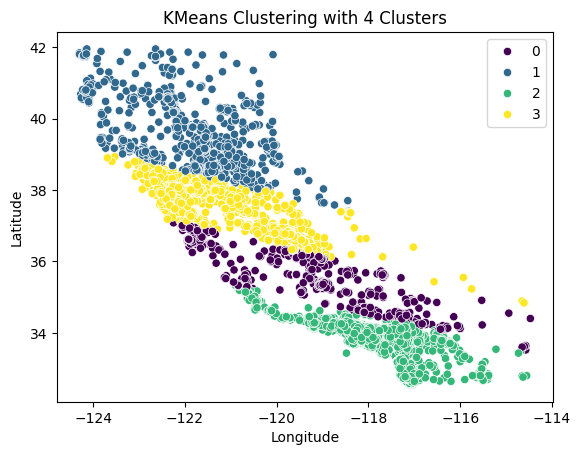

In [130]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

sns.scatterplot(data=X_train, x='Longitude', y='Latitude', hue=kmeans.labels_, palette='viridis')
plt.title('KMeans Clustering with 4 Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [132]:
silhouette_avg = silhouette_score(X_train_norm, kmeans.labels_)
print(f"For n_clusters = {4}, the average silhouette_score is : {silhouette_avg}")

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_train_norm)
    silhouette_avg = silhouette_score(X_train_norm, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 4, the average silhouette_score is : 0.7793001538742506
For n_clusters = 2, the average silhouette_score is : 0.651732124587807
For n_clusters = 3, the average silhouette_score is : 0.7953524892052838
For n_clusters = 4, the average silhouette_score is : 0.8259386401030385
For n_clusters = 5, the average silhouette_score is : 0.8289046219321752
For n_clusters = 6, the average silhouette_score is : 0.7877744162371612
For n_clusters = 7, the average silhouette_score is : 0.7866385358662057
For n_clusters = 8, the average silhouette_score is : 0.7793001538742506
